<h1> Customer Churn Analysis </h1>
In this workbook we will analyze customer churn data from a telecom provider. The workbook will be structured as follows.

1. Analysis approach
2. Exploratory Analysis
3. Data preparation and feature creation
4. Model creation and training
5. Conclusions and next steps

The key objective of this workbook will be to improve accuracy of the model. This will support a business user to understand whether a customer will churn in the future and be proactive and take actions to prevent the customer to churn.


<h2> 1. Analysis approach </h2>
In this notebook we will try to classify customer churn for a telecom provider using different types of classification methods. The classification methods we will use in this notebook are:

1. K-Nearest Neighbor
2. Random Forest
3. Gradient Boosting

We will use two datasets to predict the churn rate in this notebook:
1. <i> Telco_Churn_Status.csv </i> - 
This dataset contains information about whether a customer has churned or not and the reason for the churn.
2. <i> Telco_Churn_Services </i> - 
This information contains information about the services a customer had

Before going into the next session we import the libraries that we need for this workbook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

<h2> 2. Exploratory Analysis </h2>
We start by importing the two datasets and look at their characteristics individually.

In [2]:
status_df = pd.read_excel('Telco_Churn_Status.xlsx')
services_df = pd.read_excel('Telco_Churn_Services.xlsx')

In [3]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         7043 non-null   object
 1   Count               7043 non-null   int64 
 2   Quarter             7043 non-null   object
 3   Satisfaction Score  7043 non-null   int64 
 4   Customer Status     7043 non-null   object
 5   Churn Label         7043 non-null   object
 6   Churn Value         7043 non-null   int64 
 7   Churn Score         7043 non-null   int64 
 8   CLTV                7043 non-null   int64 
 9   Churn Category      1869 non-null   object
 10  Churn Reason        1869 non-null   object
dtypes: int64(5), object(6)
memory usage: 605.4+ KB


In [4]:
status_df.head(5)

,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


Looking at the first dataset we can see that it contains 10 columns with a mix of strings and integers.

In [5]:
services_df.info()
services_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


The second dataset contains 29 columns with a mix of strings, float and integers. Given that we have quite a lot of information from the customer I reckon we should good potential to predict the churn with these 2 datasets.

We can see that both data sets contain 7043 values. In <i> status_df </i> we can see that two columns only contain 1869 values, hence we will drop them. We will also drop the <i> Quarter </i> column in <i> services_df </i> since we have that column already in the other dataframe and we will drop it.

In [6]:
status_df = status_df.drop(['Count','Churn Category','Churn Reason', 'Churn Label', 'Customer Status'], axis = 1)
status_df.columns
services_df = services_df.drop(['Quarter', 'Count'], axis = 1)
services_df.columns

Index(['Customer ID', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

Let's join the two dataframes to one by using the key "Customer ID"

In [7]:
df_joined = pd.merge(status_df,services_df,on='Customer ID',how='outer')
display(df_joined.head(5))
df_joined.shape

,Customer ID,Quarter,Satisfaction Score,Churn Value,Churn Score,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Offer,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,Q3,3,1,91,5433,No,0,1,None,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,Q3,3,1,69,5302,Yes,1,8,Offer E,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,Q3,2,1,81,3179,No,0,18,Offer D,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,Q3,2,1,88,5337,Yes,1,25,Offer C,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,Q3,2,1,67,2793,Yes,1,37,Offer C,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


(7043, 33)

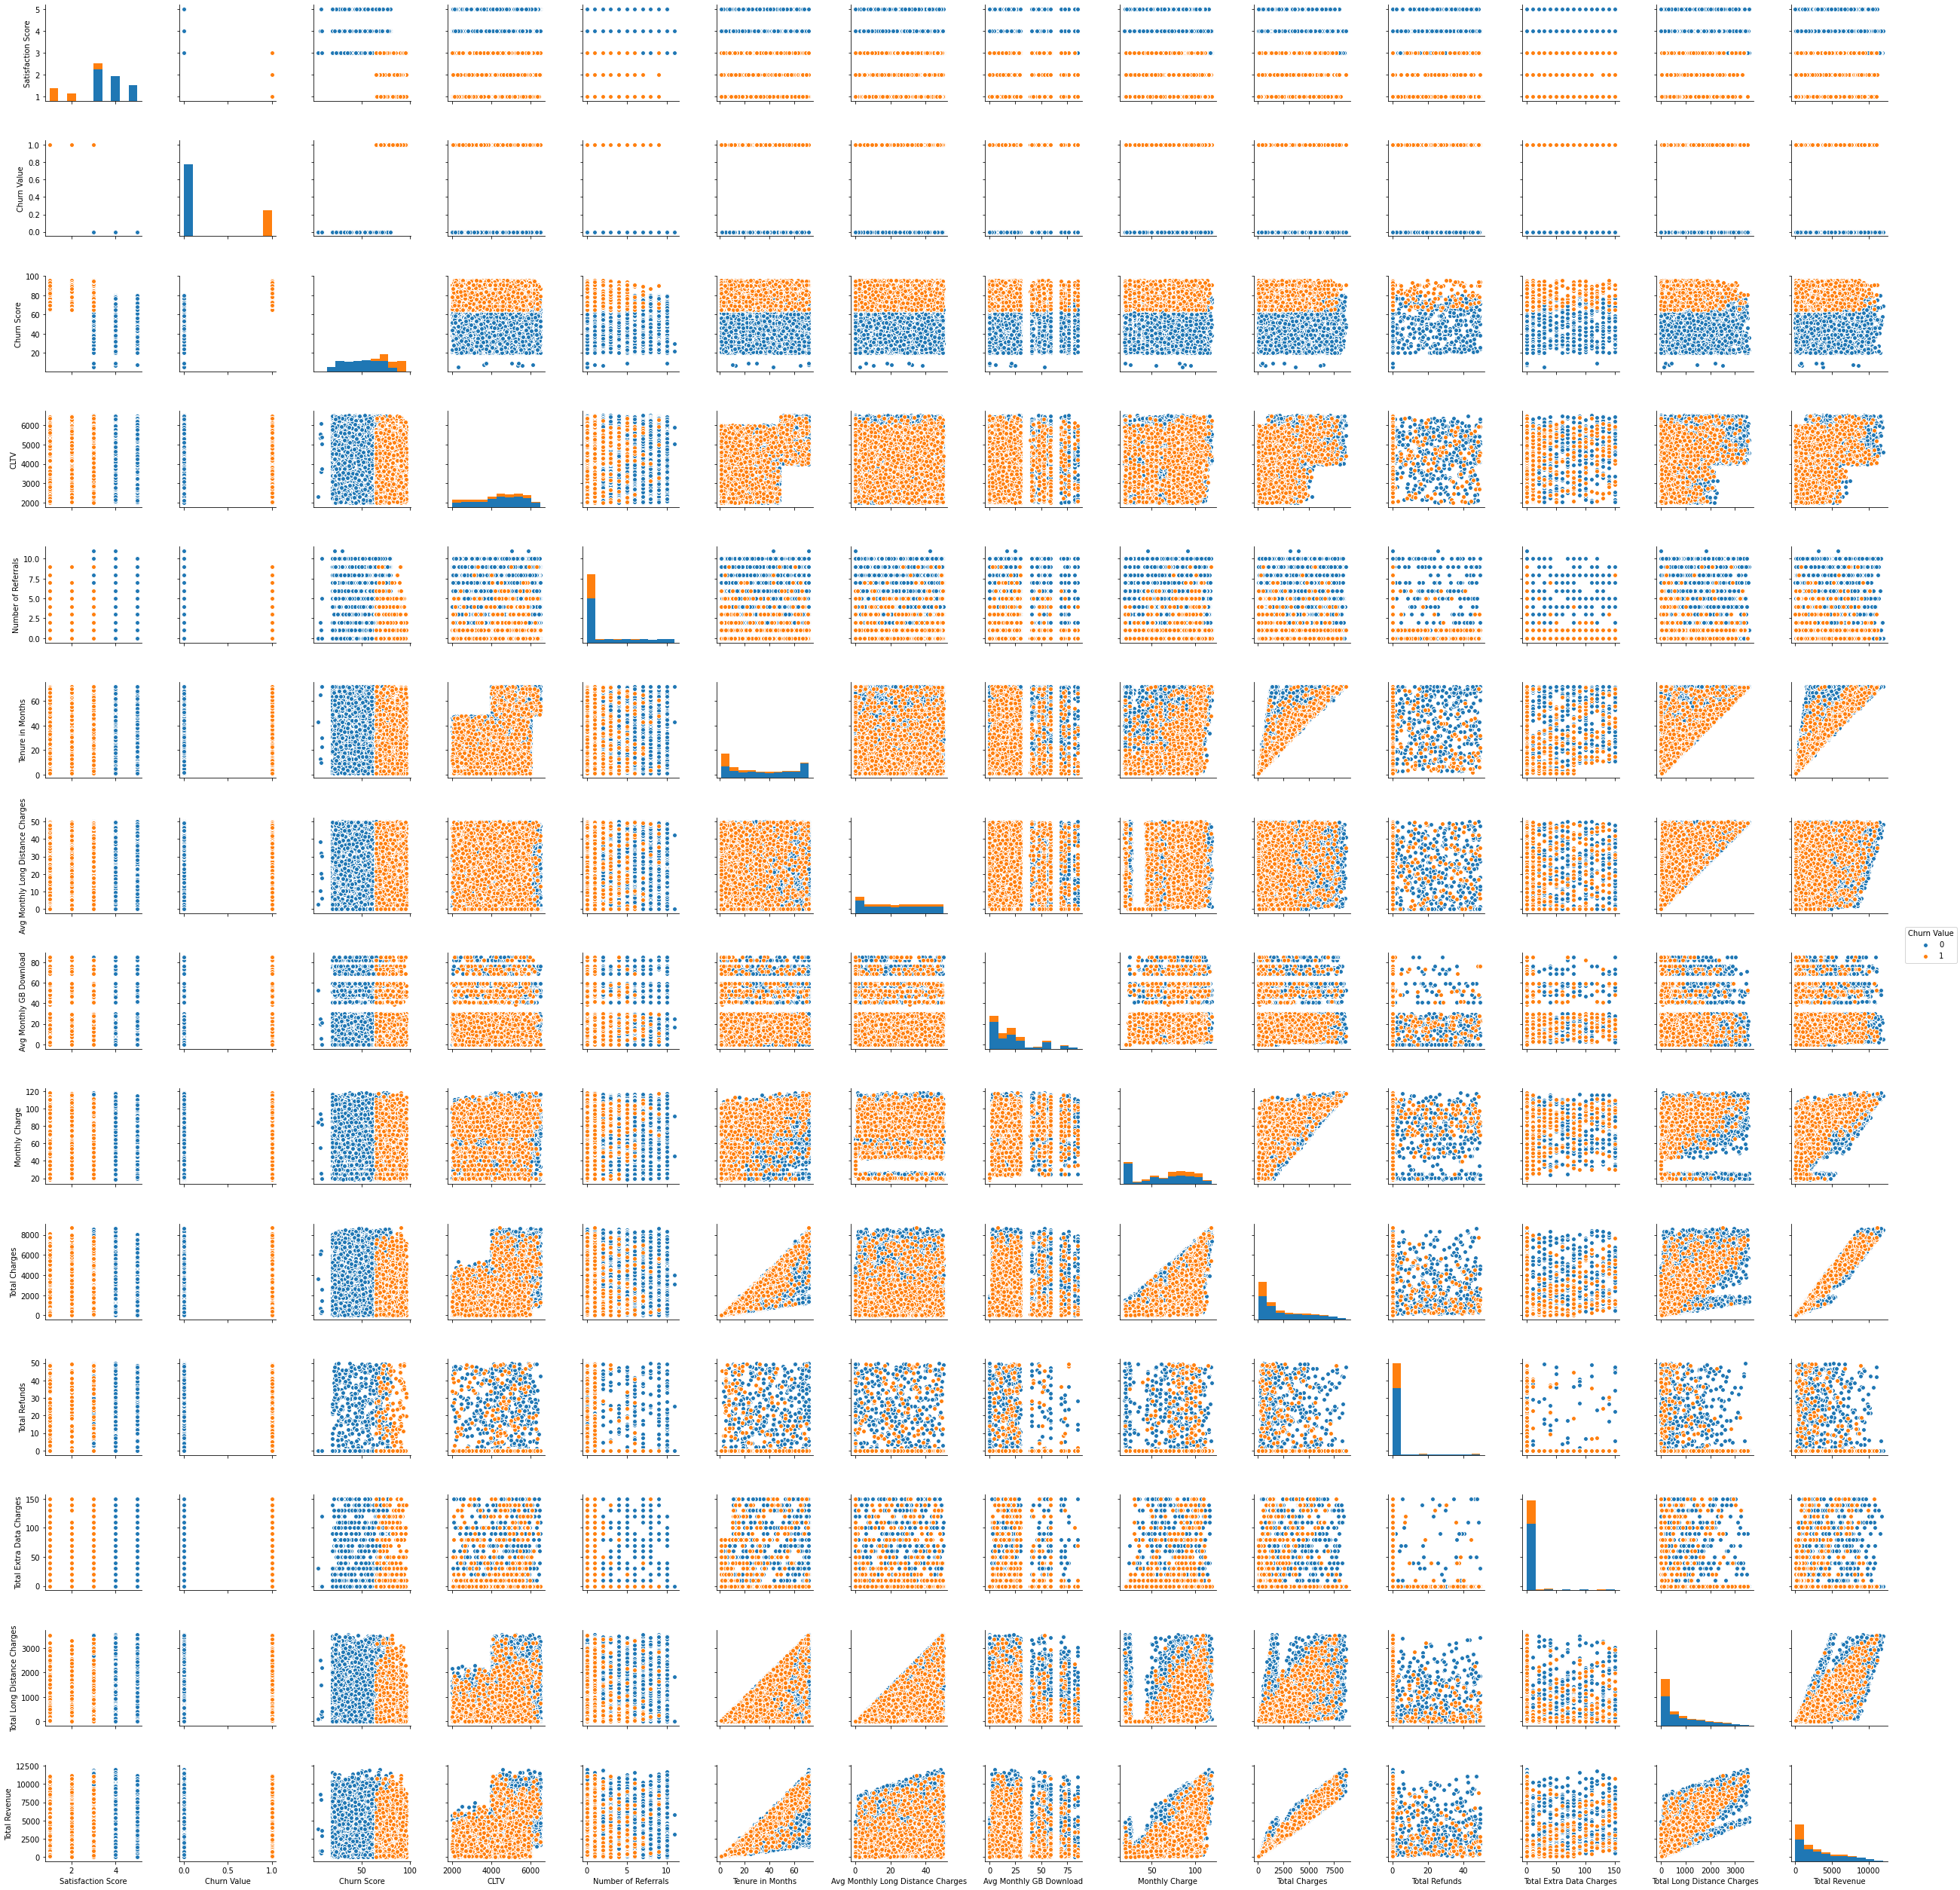

In [8]:
sns.pairplot(df_joined, hue = 'Churn Value')

Looking at the pairplot we can see that many of the variables seem to be differentiated compared to <i> Churn Value </i> which indicates there is a good chance to use these variables in order to classify whether a customer has churned or not. We also use this exercise to identify possible outliers. From the charts we can see some outliers but nothing significant, potentially impacting the general change of behavior. Having a few customers with very large data consumption for example is something likely to happen in reality. Hence, we will not address this. Let's move to the next step, to prepare the data for modelling.

<h2> 3. Data preparation </h2>

Before we can do any modelling we need to prepare the data for our models. We have a lot of features with text format, those we will change in order to be ready for the model.

In order to how to transform those variables we will arrange our features into 4 buckets:
1. Binary variables
2. Categorical and not ordinal variables
3. Categorical and ordinal variables
4. Numerical variables

In [9]:
#check number of unique values for each column
df_unique = df_joined.nunique()
df_unique

Customer ID                          7043
Quarter                                 1
Satisfaction Score                      5
Churn Value                             2
Churn Score                            81
CLTV                                 3438
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                        2
Internet Type                           4
Avg Monthly GB Download                50
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                    

Before we do anything we can see that the quarter column only has 1 unique value so let's drop that one

In [10]:
df_joined = df_joined.drop('Quarter', axis = 1)
df_joined = df_joined.drop('Churn Score', axis = 1)

In [11]:
#set customer ID to index
df_joined = df_joined.set_index('Customer ID')

#create our binary varibales
binary_variables = list(df_unique[df_unique == 2].index)
#binary_variables

#create our categorical variables
categorical_variables = list(df_unique[(df_unique > 2) & (df_unique < 7)].index)
#categorical_variables

#see our values in the categorical columns
[[i, list(df_joined[i].unique())] for i in categorical_variables]

#create our ordinal variables
ordinal_variables = ['Satisfaction Score']

#create our ordinal variables
numeric_variables = list(set(df_joined.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))
#df_joined[numeric_variables].hist(figsize=(15,6))

Okay, now when we have divided our variables into different buckets, let's transform them, 

In [12]:
#instantiate our encoders
lb, le = LabelBinarizer(), LabelEncoder()

#transform ordinal varibles
for column in ordinal_variables:
    df_joined[column] = le.fit_transform(df_joined[column])
    
#check that it has been transformed
#df_joined['Satisfaction Score']

#transform binary variables
for column in binary_variables:
    df_joined[column] = lb.fit_transform(df_joined[column])

#check that it has been transformed    
#df_joined['Phone Service']

#transform the categorical varibles with one-hot encoding
categorical_variables = list(set(categorical_variables) - set(ordinal_variables) - set(binary_variables))
df_joined = pd.get_dummies(df_joined, columns = categorical_variables, drop_first = True)

#check our new dataset
df_joined.describe().T

,count,mean,std,min,25%,50%,75%,max
Satisfaction Score,7043.0,2.244924,1.201657,0.00,2.000,2.00,3.000,4.00
Churn Value,7043.0,0.265370,0.441561,0.00,0.000,0.00,1.000,1.00
CLTV,7043.0,4400.295755,1183.057152,2003.00,3469.000,4527.00,5380.500,6500.00
Referred a Friend,7043.0,0.457476,0.498224,0.00,0.000,0.00,1.000,1.00
Number of Referrals,7043.0,1.951867,3.001199,0.00,0.000,0.00,3.000,11.00
Tenure in Months,7043.0,32.386767,24.542061,1.00,9.000,29.00,55.000,72.00
Phone Service,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.000,1.00
Avg Monthly Long Distance Charges,7043.0,22.958954,15.448113,0.00,9.210,22.89,36.395,49.99
Multiple Lines,7043.0,0.421837,0.493888,0.00,0.000,0.00,1.000,1.00
Internet Service,7043.0,0.783331,0.412004,0.00,1.000,1.00,1.000,1.00


In [13]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8779-QRDMV to 3186-AJIEK
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Satisfaction Score                 7043 non-null   int64  
 1   Churn Value                        7043 non-null   int64  
 2   CLTV                               7043 non-null   int64  
 3   Referred a Friend                  7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Phone Service                      7043 non-null   int64  
 7   Avg Monthly Long Distance Charges  7043 non-null   float64
 8   Multiple Lines                     7043 non-null   int64  
 9   Internet Service                   7043 non-null   int64  
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-nu

As you can see our new avariables are on different scales, hence we need to scale our features. We do that using our MinMax Scaler

In [14]:
#instantiate the scaler
mm = MinMaxScaler()

#we just need to scale the ordinal variables and numeric variables since the others are already between 0 and 1
for column in [ordinal_variables + numeric_variables]:
    df_joined[column] = mm.fit_transform(df_joined[column])
df_joined.describe().T

,count,mean,std,min,25%,50%,75%,max
Satisfaction Score,7043.0,0.561231,0.300414,0.0,0.500000,0.500000,0.750000,1.0
Churn Value,7043.0,0.265370,0.441561,0.0,0.000000,0.000000,1.000000,1.0
CLTV,7043.0,0.533088,0.263077,0.0,0.325995,0.561263,0.751056,1.0
Referred a Friend,7043.0,0.457476,0.498224,0.0,0.000000,0.000000,1.000000,1.0
Number of Referrals,7043.0,0.177442,0.272836,0.0,0.000000,0.000000,0.272727,1.0
Tenure in Months,7043.0,0.442067,0.345663,0.0,0.112676,0.394366,0.760563,1.0
Phone Service,7043.0,0.903166,0.295752,0.0,1.000000,1.000000,1.000000,1.0
Avg Monthly Long Distance Charges,7043.0,0.459271,0.309024,0.0,0.184237,0.457892,0.728046,1.0
Multiple Lines,7043.0,0.421837,0.493888,0.0,0.000000,0.000000,1.000000,1.0
Internet Service,7043.0,0.783331,0.412004,0.0,1.000000,1.000000,1.000000,1.0


We can now see that all our values are in the range of 0 and 1. Let's quickly look at the correlation to the churn variable before we jump into modelling.

In [15]:
correlations = df_joined.corr().abs() #this returns all correlations in the entire df
correlations = correlations['Churn Value'] #this returns all correlations against the churn value which will be our target
correlations_sorted = correlations.sort_values(kind="quicksort", ascending = False) #sort the correlations ascending
display(correlations_sorted)

Churn Value                          1.000000
Satisfaction Score                   0.754649
Tenure in Months                     0.352861
Contract_Two Year                    0.328195
Number of Referrals                  0.286540
Internet Type_Fiber Optic            0.279623
Internet Service                     0.227890
Internet Type_None                   0.227890
Total Long Distance Charges          0.223756
Total Revenue                        0.223003
Payment Method_Credit Card           0.218528
Offer_Offer E                        0.214648
Total Charges                        0.198546
Monthly Charge                       0.193356
Paperless Billing                    0.191825
Contract_One Year                    0.190418
Online Security                      0.171226
Unlimited Data                       0.166545
Premium Tech Support                 0.164674
Referred a Friend                    0.149122
CLTV                                 0.127463
Offer_Offer A                     

We can see rather high correlations with the churn value. I am little bit unsure whether the Satisfaction score is available prior to churn, but in theory it could be, hence I keep it. Before moving on I save the dataframe to a csv file in case I want to use the processed data later.

In [16]:
df_joined.to_csv('churndata_processed.csv', index = False)

<h2> 4. Model Creation and Training </h2>
Now when we have prepared our data for training we can start creating our models to predict the data. As mentioned in the beginning of the workbook we will try 3 different methods to predict churn:

1. K-Nearest Neighbor
2. Random Forest
3. Gradient Boosting

We will measure the different models with the following metrics:

- Accuracy
- F1

We will also look at the Confusion Matrix to get a detailed understanding of how the models predict churn.


In [17]:
#reset index
df_joined = df_joined.reset_index(drop = True)

#Set up target variable
y, X = df_joined['Churn Value'], df_joined.drop(columns = ['Churn Value'])

#check if imbalanced
y.value_counts(normalize = True)

0    0.73463
1    0.26537
Name: Churn Value, dtype: float64

Since we see that our target variable is imbalanced we choose to use Stratified Shuffleing in order to keep this imbalance between the train and test set.

In [18]:
#Instantiate the stratified shuffle split with 1500 datapoints in the test set
target = 'Churn Value'

#all columns except target
feature_cols = [x for x in df_joined.columns if x != target]

#instantiate the object
sss = StratifiedShuffleSplit(n_splits=1, test_size=1500, random_state=42)

#get the indices
train_idx, test_idx = next(sss.split(df_joined[feature_cols], df_joined[target]))

#create our test and train sets
X_train = df_joined.loc[train_idx, feature_cols]
y_train = df_joined.loc[train_idx, target]

X_test = df_joined.loc[test_idx, feature_cols]
y_test = df_joined.loc[test_idx, target]

#check for imbalance
display(y_train.value_counts(normalize = True))
display(y_test.value_counts(normalize = True))

0    0.73462
1    0.26538
Name: Churn Value, dtype: float64

0    0.734667
1    0.265333
Name: Churn Value, dtype: float64

<h3> 4.1 K-Nearest Neighbor </h3>
Let's start to predict the churn with <i> K-Nearest Neighbor </i>.

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1102
           1       0.75      0.71      0.73       398

    accuracy                           0.86      1500
   macro avg       0.82      0.81      0.82      1500
weighted avg       0.86      0.86      0.86      1500

Accuracy score:  0.86
F1 score:  0.73


Text(24.0, 0.5, 'Prediction')

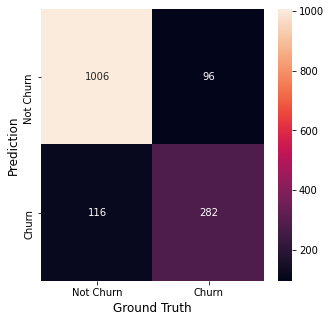

In [19]:
#instantiate model

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred_KNN = knn.predict(X_test)

#print metrics
print(classification_report(y_test, y_pred_KNN))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred_KNN), 2))
print('F1 score: ', round(f1_score(y_test, y_pred_KNN), 2))

#visualize our confusion matrix
#sns.set_palette(sns.color_palette(colors))
_, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_KNN), annot = True, fmt = 'd')
labels = ['Not Churn', 'Churn']
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel('Ground Truth', fontsize = 12)
ax.set_ylabel('Prediction', fontsize = 12)


We can see from all the metrics that the accuracy of the model is okay. For not churn, it performs rather well but of course we are more interested in the Churn predictions. The F1 score is 0.73 - much room for improvement.

<h3> Bagging/Random Forest

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1102
           1       0.97      0.85      0.90       398

    accuracy                           0.95      1500
   macro avg       0.96      0.92      0.93      1500
weighted avg       0.95      0.95      0.95      1500

Accuracy score:  0.95
F1 score:  0.9


Text(24.0, 0.5, 'Prediction')

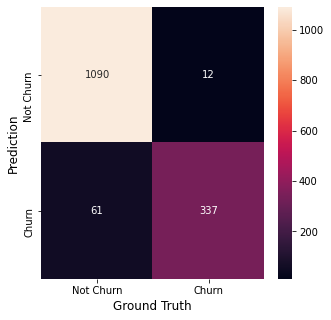

In [20]:
#instantiate model

RF = RandomForestClassifier().fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

#print metrics
print(classification_report(y_test, y_pred_RF))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred_RF), 2))
print('F1 score: ', round(f1_score(y_test, y_pred_RF), 2))

#visualize our confusion matrix
#sns.set_palette(sns.color_palette(colors))
_, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot = True, fmt = 'd')
labels = ['Not Churn', 'Churn']
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel('Ground Truth', fontsize = 12)
ax.set_ylabel('Prediction', fontsize = 12)

Using the Random Forest we can see that model predicts Churn better. The precision jumped from 0.75 to 0.97 and F1 score from 0.73 to 0.91 - impressive! Recall is still at 0.85, indicating there is room for improvement.

<h3> Gradient Booster Classifier

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1102
           1       0.95      0.87      0.91       398

    accuracy                           0.95      1500
   macro avg       0.95      0.93      0.94      1500
weighted avg       0.95      0.95      0.95      1500

Accuracy score:  0.95
F1 score:  0.91


Text(24.0, 0.5, 'Prediction')

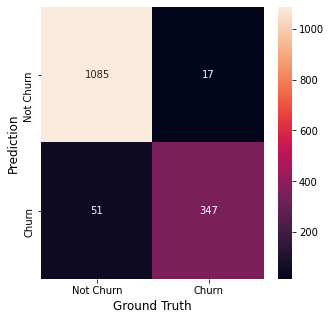

In [21]:
GB = GradientBoostingClassifier().fit(X_train, y_train)
y_pred_GB = GB.predict(X_test)

#print metrics
print(classification_report(y_test, y_pred_GB))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred_GB), 2))
print('F1 score: ', round(f1_score(y_test, y_pred_GB), 2))

#visualize our confusion matrix
#sns.set_palette(sns.color_palette(colors))
_, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_GB), annot = True, fmt = 'd')
labels = ['Not Churn', 'Churn']
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel('Ground Truth', fontsize = 12)
ax.set_ylabel('Prediction', fontsize = 12)

Similarily, the Gradient Boosting algorithm, predicts the churn better than the K-nearest neighbor. The result from the GB model is a bit more balanced - we see a bit smaller increase in precision compared to the Random Forest but in turn, a higher increase in Recall. The F1 score remains the same for GB as for Random Forest.

<h2> 5. Conclusion and next steps </h2>

To conclude, the Random forest missed a few less Churns compared to the GB model and predicted a few more Churns in vain compared to the GB model. In this case I would say that catching the actual churns are more important, and hence the Random Forest achieved the best results. Nevertheless, the difference is very little and I believe a more thorough model tuning must be done before there can be any conclusions of which model is best.

Consequently, as next steps I recommend to conduct a thorough model tuning to optimize the results, and hence have more background to understand which models is best. I would also say that a benefit with the Random Forest, is that it is slighlty more interpretable than the Gradient Boosting.

Given that we achieved rather good results without any tuning it would also be intersting to explore whether it is possible to predict WHEN a customer will churn. That would add a lot of benefit to also have an understanding when a customer will churn, not only if.